#### df sää 

In [32]:
import pandas as pd

In [33]:
df = pd.read_csv("Kaarina Yltöinen 5.3.2024 - 22.4.2024_20dd75b2-9da3-4c7c-b0e5-f5bad81664f3.csv")

In [34]:
df.head(5)

,Havaintoasema,Vuosi,Kuukausi,Päivä,Aika [UTC],Tunnin sademäärä [mm],Lämpötilan keskiarvo [°C],Ylin lämpötila [°C],Alin lämpötila [°C],Suhteellisen kosteuden keskiarvo [%],Keskituulen nopeus [m/s],Kovin keskituulen nopeus [m/s],Tuulen suunnan keskiarvo [°],Kovin puuska [m/s],Ilmanpaineen keskiarvo [hPa]
0,Kaarina Yltöinen,2024,3,5,00:00,0.0,1.3,1.4,1.1,85,-,-,-,-,1030.4
1,Kaarina Yltöinen,2024,3,5,01:00,0.0,1.3,1.4,1.2,86,-,-,-,-,1030.5
2,Kaarina Yltöinen,2024,3,5,02:00,0.0,1.4,1.5,1.3,87,-,-,-,-,1030.7
3,Kaarina Yltöinen,2024,3,5,03:00,0.0,1.5,1.8,1.4,86,-,-,-,-,1030.8
4,Kaarina Yltöinen,2024,3,5,04:00,0.0,1.4,1.8,0.5,80,-,-,-,-,1031.0


In [35]:
# Tarkastetaan puuttuvat sarakkeet
print(df["Keskituulen nopeus [m/s]"].value_counts())
print(df["Kovin keskituulen nopeus [m/s]"].value_counts())
print(df["Tuulen suunnan keskiarvo [°]"].value_counts())
print(df["Kovin puuska [m/s]"].value_counts())

Keskituulen nopeus [m/s]
-    1165
Name: count, dtype: int64
Kovin keskituulen nopeus [m/s]
-    1165
Name: count, dtype: int64
Tuulen suunnan keskiarvo [°]
-    1165
Name: count, dtype: int64
Kovin puuska [m/s]
-    1165
Name: count, dtype: int64


In [36]:
df = df.drop(columns=["Keskituulen nopeus [m/s]", "Kovin keskituulen nopeus [m/s]", "Tuulen suunnan keskiarvo [°]", "Kovin puuska [m/s]"])
df.head(5)

,Havaintoasema,Vuosi,Kuukausi,Päivä,Aika [UTC],Tunnin sademäärä [mm],Lämpötilan keskiarvo [°C],Ylin lämpötila [°C],Alin lämpötila [°C],Suhteellisen kosteuden keskiarvo [%],Ilmanpaineen keskiarvo [hPa]
0,Kaarina Yltöinen,2024,3,5,00:00,0.0,1.3,1.4,1.1,85,1030.4
1,Kaarina Yltöinen,2024,3,5,01:00,0.0,1.3,1.4,1.2,86,1030.5
2,Kaarina Yltöinen,2024,3,5,02:00,0.0,1.4,1.5,1.3,87,1030.7
3,Kaarina Yltöinen,2024,3,5,03:00,0.0,1.5,1.8,1.4,86,1030.8
4,Kaarina Yltöinen,2024,3,5,04:00,0.0,1.4,1.8,0.5,80,1031.0


In [37]:
import numpy as np
# Muunetaan "-" NaN arvoksi
df = df.replace('-',np.NaN)
df["Date"] = df["Vuosi"].astype(str) + "-" + df["Kuukausi"].astype(str) + "-" +  df["Päivä"].astype(str) + " " + df["Aika [UTC]"]
df["Date"] = pd.to_datetime(df["Date"])
df.dtypes

Havaintoasema                                   object
Vuosi                                            int64
Kuukausi                                         int64
Päivä                                            int64
Aika [UTC]                                      object
Tunnin sademäärä [mm]                          float64
Lämpötilan keskiarvo [°C]                      float64
Ylin lämpötila [°C]                            float64
Alin lämpötila [°C]                            float64
Suhteellisen kosteuden keskiarvo [%]             int64
Ilmanpaineen keskiarvo [hPa]                   float64
Date                                    datetime64[ns]
dtype: object

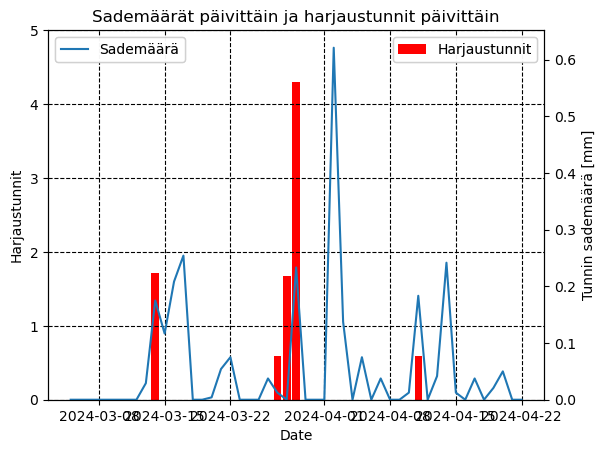

In [38]:
"""
Harjauspäivät
2024-03-14    1.719722
2024-03-27    0.587778
2024-03-28    1.673056
2024-03-29    4.297222
2024-04-11    0.589444
"""


dates = ['2024-03-14', '2024-03-27', '2024-03-28', '2024-03-29', '2024-04-11']
values = [1.719722, 0.587778, 1.673056, 4.297222, 0.589444]
brushing_days = pd.Series(values, index=pd.to_datetime(dates))
import matplotlib.pyplot as plt





# plt.plot(df["Date"], df["Tunnin sademäärä [mm]"])


df2 = df[["Date", "Tunnin sademäärä [mm]"]].set_index('Date').groupby(pd.Grouper(freq='d')).mean().dropna(how='all')
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(brushing_days.index, brushing_days.values, label="Harjaustunnit", color="red")
ax2.plot(df2, label="Sademäärä")
legend1 = ax1.legend(loc='upper right')
legend2 = ax2.legend(loc='upper left')
ax1.add_artist(legend1)
ax2.add_artist(legend2)
ax1.grid(color="black", linestyle="dashed")
ax2.set_ylabel("Tunnin sademäärä [mm]")
ax1.set_ylabel("Harjaustunnit")
plt.title("Sademäärät päivittäin ja harjaustunnit päivittäin")
ax1.set_xlabel("Date")
ax1.set_ylim(top=5)
ax2.set_ylim(0,)
plt.show()